In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO   # <-- use this instead of pd.compat

data = """approach;num_experiments;avg_num_steps;avg_overall_mean_latency;avg_peak_latency;avg_num_times_crossed_above_sla;avg_total_seconds_above_sla;avg_total_seconds_in_cloud_cluster;avg_percent_time_below_sla
random_forest;16;938.9375;0.0643868400570464;0.4543109188477198;2.0625;365.625;18631.875;98.26572265603741
informer_30m;4;953.75;0.06503044793209756;0.5948090046644211;7.75;690.0000000000002;23557.5;97.57295845434754
reactive;25;939.4;0.07343853487541521;0.528359773159027;6.2;1088.4;15956.4;95.66861792794775
multiple_linear_regression;3;951.0;0.0823829574875974;0.5991657773653666;7.0;1130.0;17120.0;95.89683640245181
"""

# Load into dataframe
df = pd.read_csv(StringIO(data), sep=";")




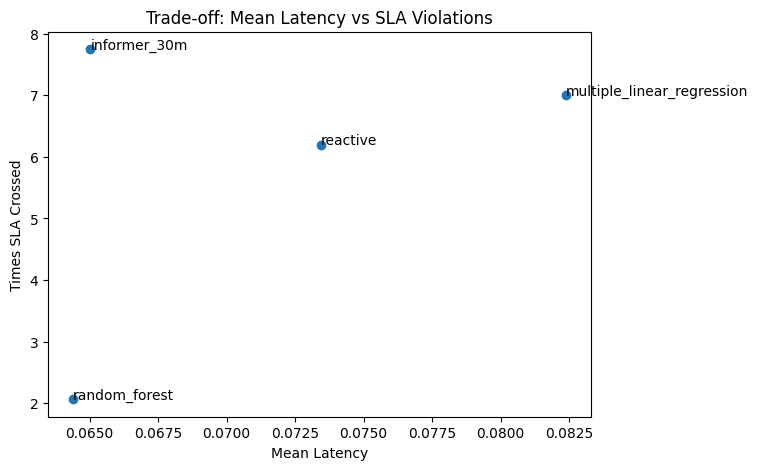

In [2]:
# Scatter plot: SLA violations vs. mean latency
plt.figure(figsize=(7,5))
plt.scatter(df["avg_overall_mean_latency"], df["avg_num_times_crossed_above_sla"])
for i, txt in enumerate(df["approach"]):
    plt.annotate(txt, (df["avg_overall_mean_latency"][i], df["avg_num_times_crossed_above_sla"][i]))
plt.xlabel("Mean Latency")
plt.ylabel("Times SLA Crossed")
plt.title("Trade-off: Mean Latency vs SLA Violations")
plt.show()

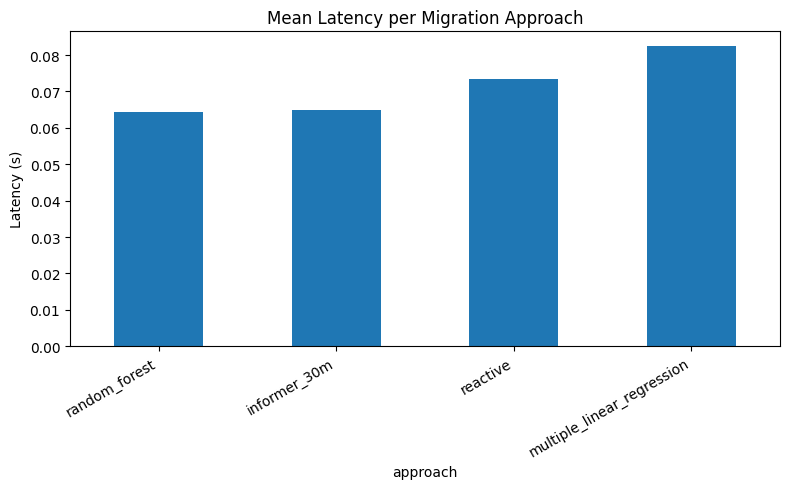

In [3]:
df.set_index("approach")["avg_overall_mean_latency"].plot(
    kind="bar", figsize=(8,5)
)
plt.ylabel("Latency (s)")
plt.title("Mean Latency per Migration Approach")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


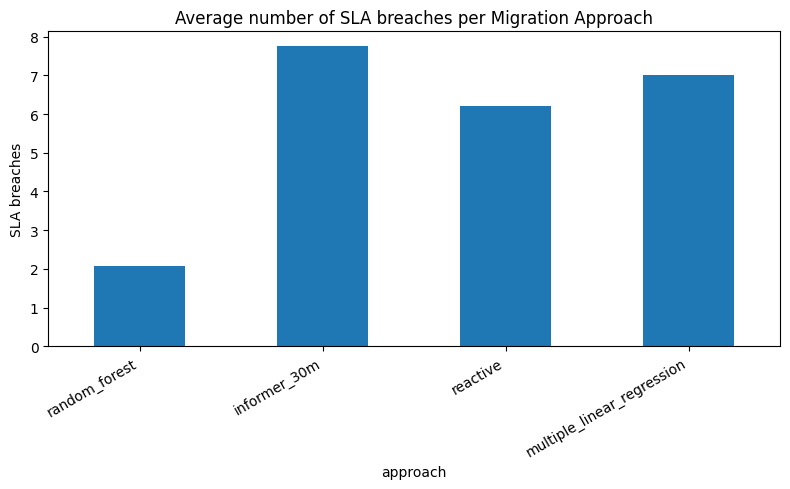

In [4]:
df.set_index("approach")["avg_num_times_crossed_above_sla"].plot(
    kind="bar", figsize=(8,5)
)
plt.ylabel("SLA breaches")
plt.title("Average number of SLA breaches per Migration Approach")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


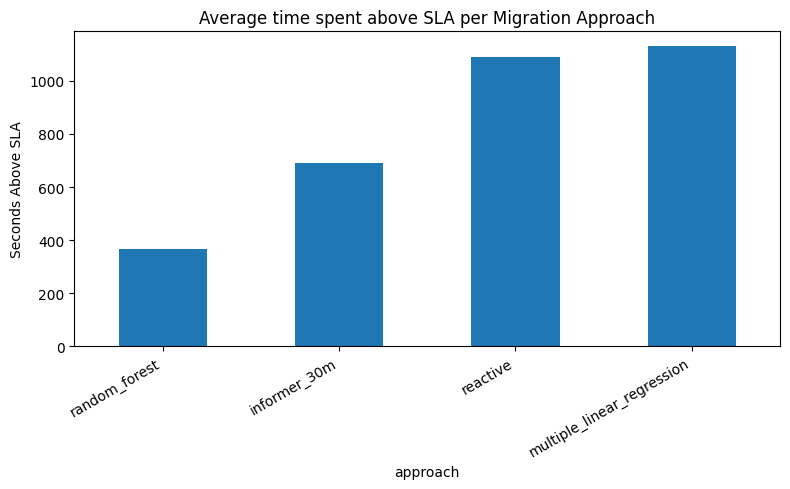

In [5]:
df.set_index("approach")["avg_total_seconds_above_sla"].plot(
    kind="bar", figsize=(8,5)
)
plt.ylabel("Seconds Above SLA")
plt.title("Average time spent above SLA per Migration Approach")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


<Figure size 700x500 with 0 Axes>

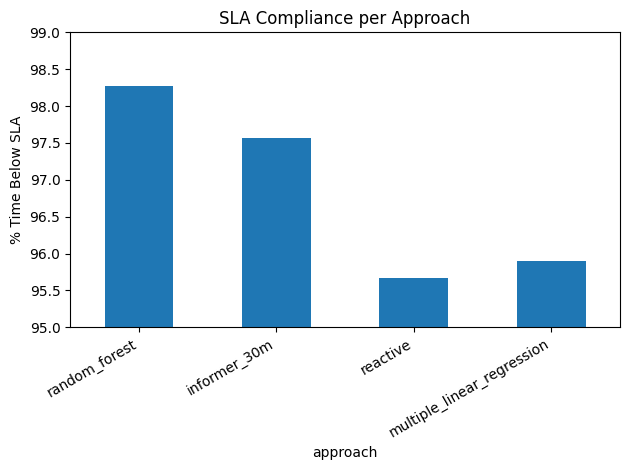

In [6]:
plt.figure(figsize=(7,5))
df.plot(x="approach", y="avg_percent_time_below_sla", kind="bar", legend=False)
plt.ylabel("% Time Below SLA")
plt.title("SLA Compliance per Approach")
plt.ylim(95, 99)  # <-- zoom in so differences show
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

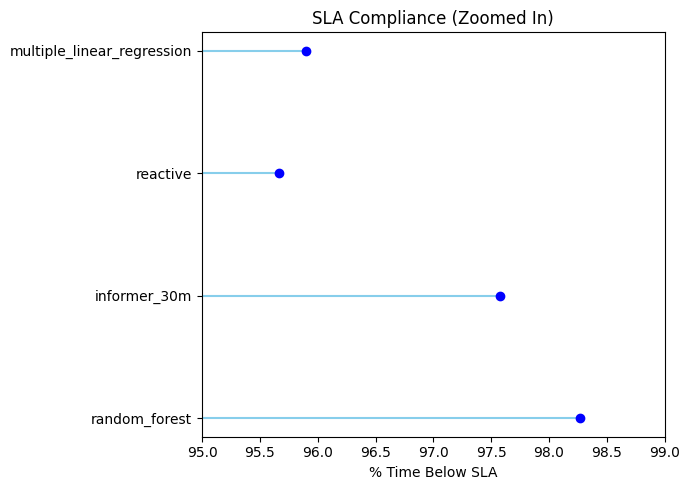

In [7]:
plt.figure(figsize=(7,5))
plt.hlines(y=df["approach"], xmin=95, xmax=df["avg_percent_time_below_sla"], color="skyblue")
plt.plot(df["avg_percent_time_below_sla"], df["approach"], "o", color="blue")
plt.xlabel("% Time Below SLA")
plt.title("SLA Compliance (Zoomed In)")
plt.xlim(95, 99)  # zoom
plt.tight_layout()
plt.show()


<Figure size 700x500 with 0 Axes>

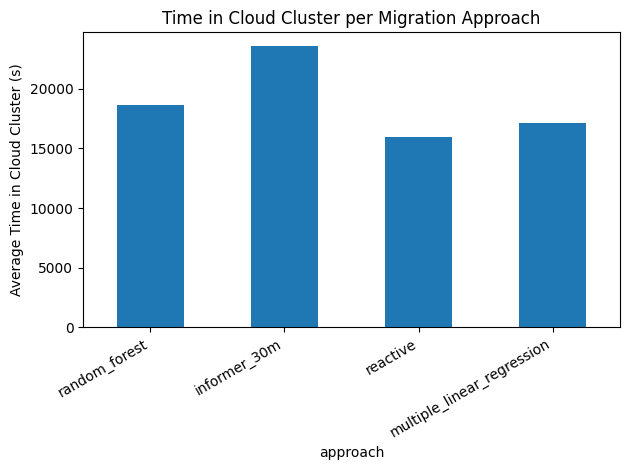

In [8]:
plt.figure(figsize=(7,5))
df.plot(x="approach", y="avg_total_seconds_in_cloud_cluster", kind="bar", legend=False)
plt.ylabel("Average Time in Cloud Cluster (s)")
plt.title("Time in Cloud Cluster per Migration Approach")
# plt.ylim(95, 99)  # <-- zoom in so differences show
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
df = pd.read_csv("reactive_vs_rf/detailed_pairs.csv")
top = df.sort_values("avoided_seconds", ascending=False).head(10)
print(top[["reactive_experiment","rf_experiment","avoided_seconds"]].to_string(index=False))

                                                                                    reactive_experiment                                                                                        rf_experiment  avoided_seconds
validation-reactive-updated-job-0_2025-09-14T160419_2025-09-15T000421_created_at_2025-09-15T000423.json validation-random-forest-job-0_2025-09-18T230054_2025-09-19T070056_created_at_2025-09-19T070058.json           1890.0
validation-reactive-updated-job-0_2025-09-14T160419_2025-09-15T000421_created_at_2025-09-15T000423.json validation-random-forest-job-0_2025-09-21T070241_2025-09-21T150243_created_at_2025-09-21T150245.json           1770.0
validation-reactive-updated-job-0_2025-09-14T160419_2025-09-15T000421_created_at_2025-09-15T000423.json validation-random-forest-job-0_2025-09-20T230225_2025-09-21T070227_created_at_2025-09-21T070229.json           1740.0
validation-reactive-updated-job-0_2025-09-09T080007_2025-09-09T160009_created_at_2025-09-09T160012.json validati

In [10]:
408150/375

1088.4

In [12]:
1-(365/1088.4)

0.6646453509739068

In [13]:
266730/375

711.28

In [14]:
1088.4-711.28


377.1200000000001

Cloud usage

In [ ]:
18631,15956

15595